## Business Case Study

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


### Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

There are 10 columns in the dataset: 

1. User_ID:	User ID
2. Product_ID:	Product ID
3. Gender:	Sex of User
4. Age:	Age in bins
5. Occupation:	Occupation(Masked)
6. City_Category:	Category of the City (A,B,C)
7. StayInCurrentCityYears:	Number of years stay in current city
8. Marital_Status:	Marital Status
9. ProductCategory:	Product Category (Masked)
10. Purchase:	Purchase Amount


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('walmart_data.csv')

df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
546351,1000634,P00375436,F,0-17,10,C,4+,0,20,495
24591,1003806,P00213542,M,18-25,4,A,4+,0,11,6028
160021,1000757,P00184942,M,26-35,12,A,1,0,1,19545
241369,1001219,P00232042,M,26-35,7,C,3,1,11,1696
436481,1001199,P00248442,M,51-55,13,C,4+,1,3,11016
458707,1004562,P00073842,M,36-45,10,A,1,1,1,7867
451462,1003547,P00365242,M,36-45,16,A,2,0,5,7024
458998,1004618,P00142142,M,26-35,14,B,1,1,1,7704
271612,1005851,P00111842,F,18-25,20,A,0,1,8,9798
18952,1002986,P00268842,M,26-35,4,A,2,1,8,3885


### Basic Analysis

In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
for col in df.columns:
    print(f"{col} :  {df[col].unique()}")
    print("--------------------------------")


User_ID :  [1000001 1000002 1000003 ... 1004113 1005391 1001529]
--------------------------------
Product_ID :  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
--------------------------------
Gender :  ['F' 'M']
--------------------------------
Age :  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
--------------------------------
Occupation :  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
--------------------------------
City_Category :  ['A' 'C' 'B']
--------------------------------
Stay_In_Current_City_Years :  ['2' '4+' '3' '1' '0']
--------------------------------
Marital_Status :  [0 1]
--------------------------------
Product_Category :  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
--------------------------------
Purchase :  [ 8370 15200  1422 ...   135   123   613]
--------------------------------


In [9]:
for col in df.columns:
    print(f"{col} :  {df[col].nunique()}")
    print("--------------------------------")


User_ID :  5891
--------------------------------
Product_ID :  3631
--------------------------------
Gender :  2
--------------------------------
Age :  7
--------------------------------
Occupation :  21
--------------------------------
City_Category :  3
--------------------------------
Stay_In_Current_City_Years :  5
--------------------------------
Marital_Status :  2
--------------------------------
Product_Category :  20
--------------------------------
Purchase :  18105
--------------------------------


In [10]:
cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

for col in cols:
    print(f"{col} :  {df[col].value_counts()}")
    print("--------------------------------")

Gender :  Gender
M    414259
F    135809
Name: count, dtype: int64
--------------------------------
Age :  Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
--------------------------------
City_Category :  City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64
--------------------------------
Stay_In_Current_City_Years :  Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64
--------------------------------
Marital_Status :  Marital_Status
0    324731
1    225337
Name: count, dtype: int64
--------------------------------


### Observations:

1. There are 550068 samples and 10 columns.
2. There are no null values and duplicate values in this dataset. 
3. There are 5 numerical and 5 categorical columns. 
4. Gender and Marital_Status columns have 2 categories whereas City_Category and Stay_In_Current_City_Years columns have 3 and 5 categories respectively. 
5. Age column has been converted into bins format and it has 7 bins and Occupation column has 20 types of different job/occupation categories.
6. There are 20 different product categories in this walmart dataset. 

## Univariate Analysis for Categorical Columns

In [11]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

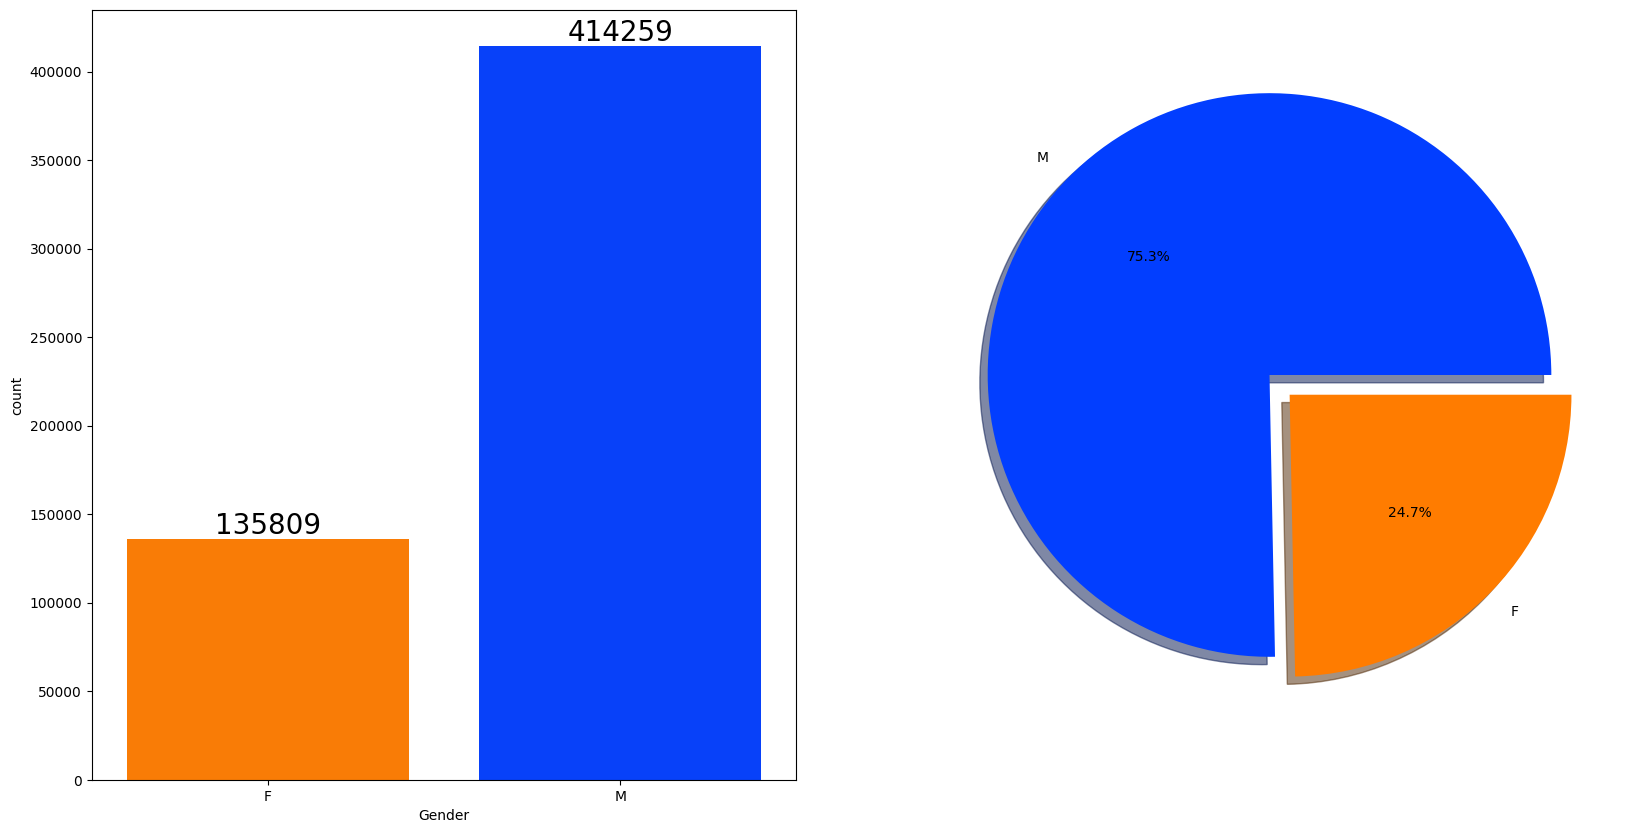

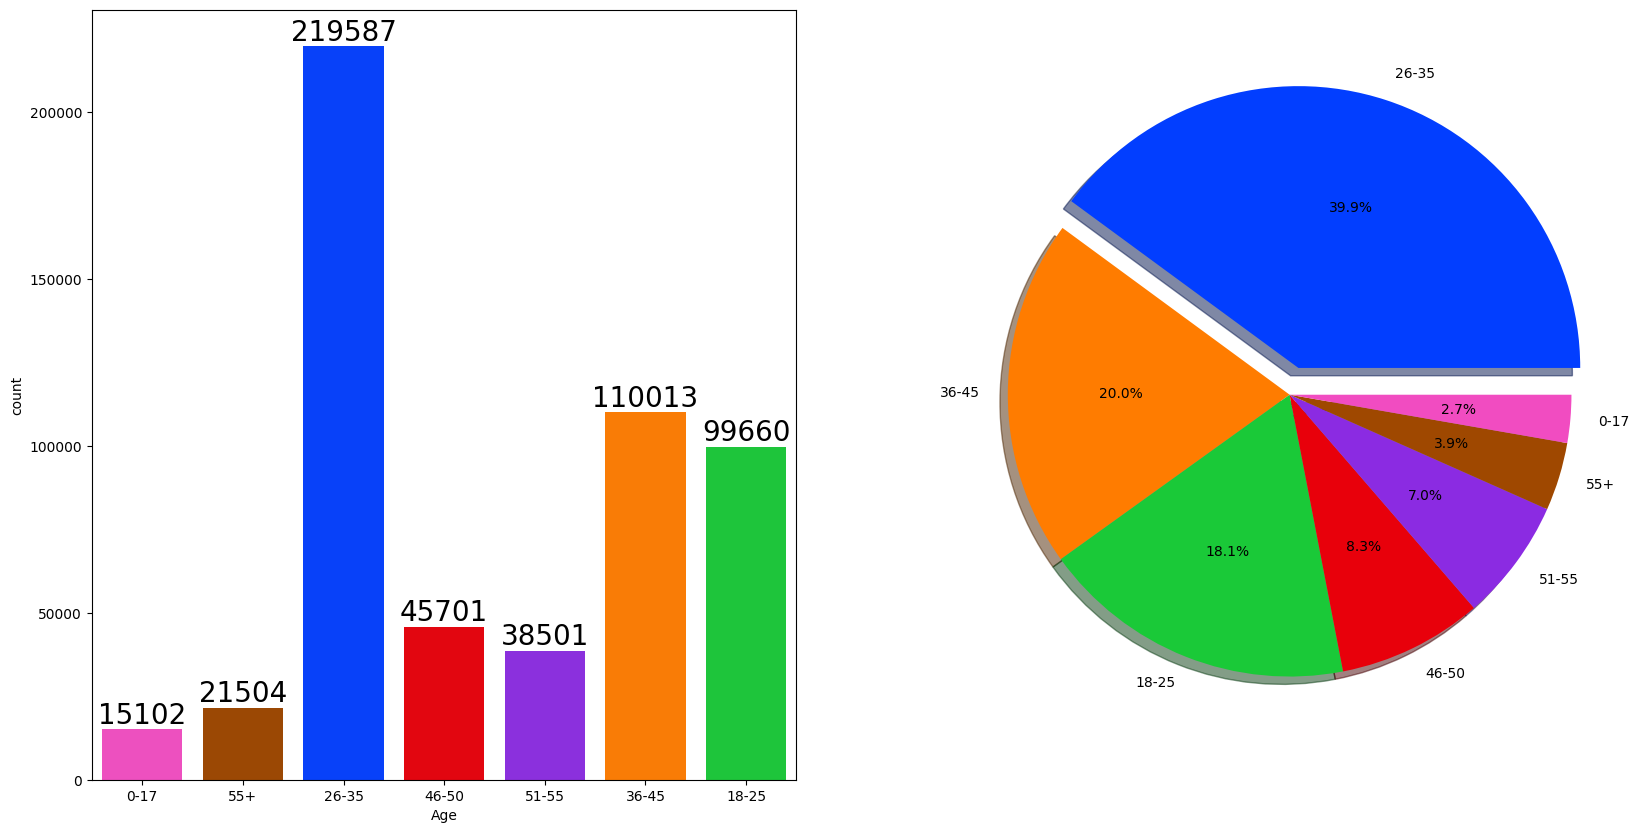

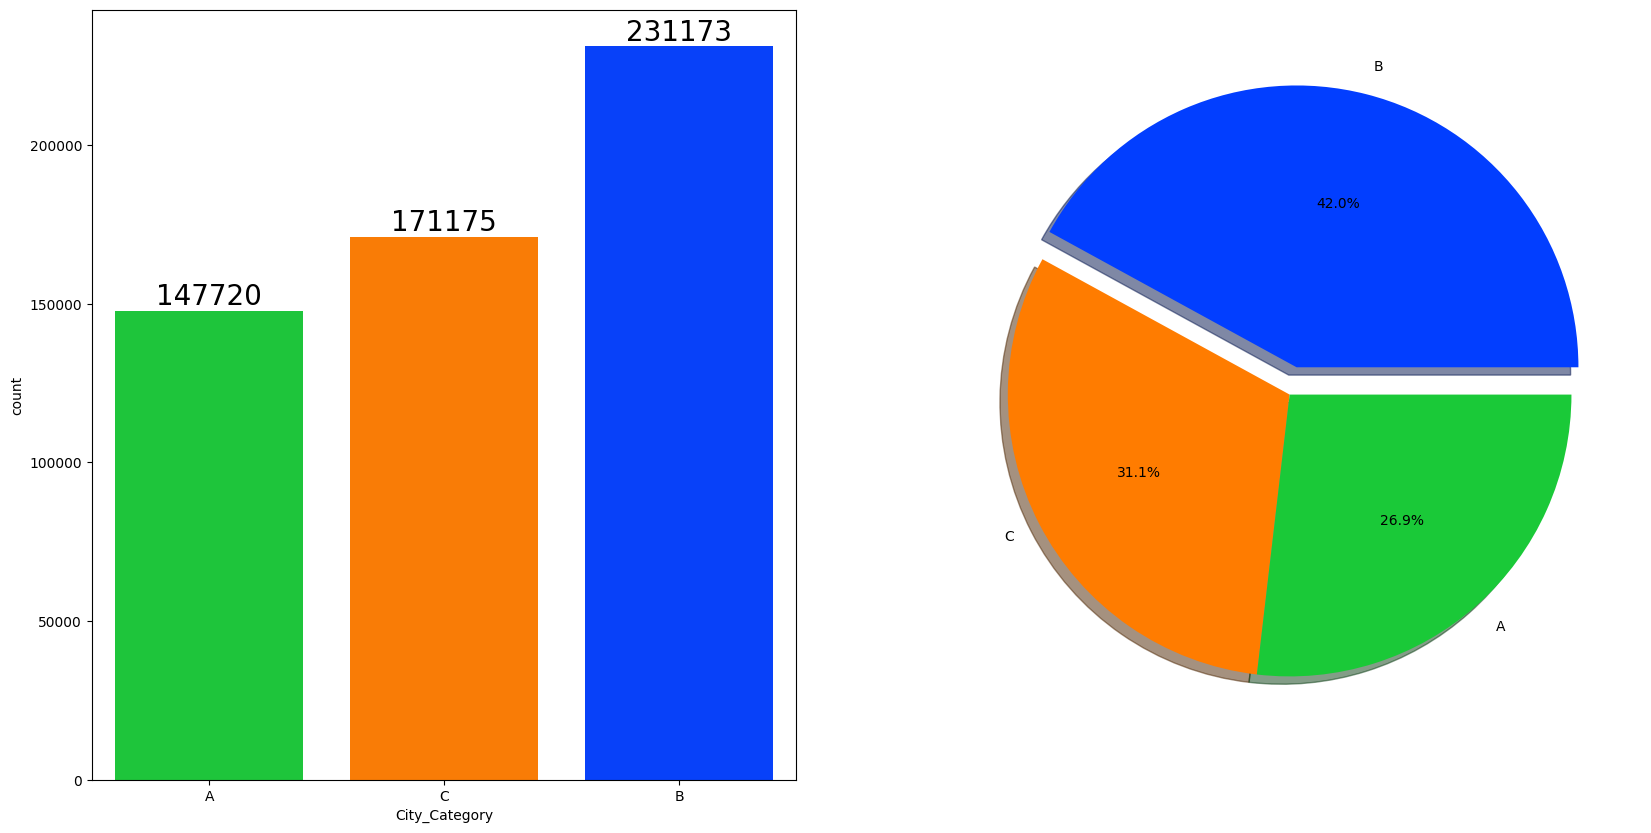

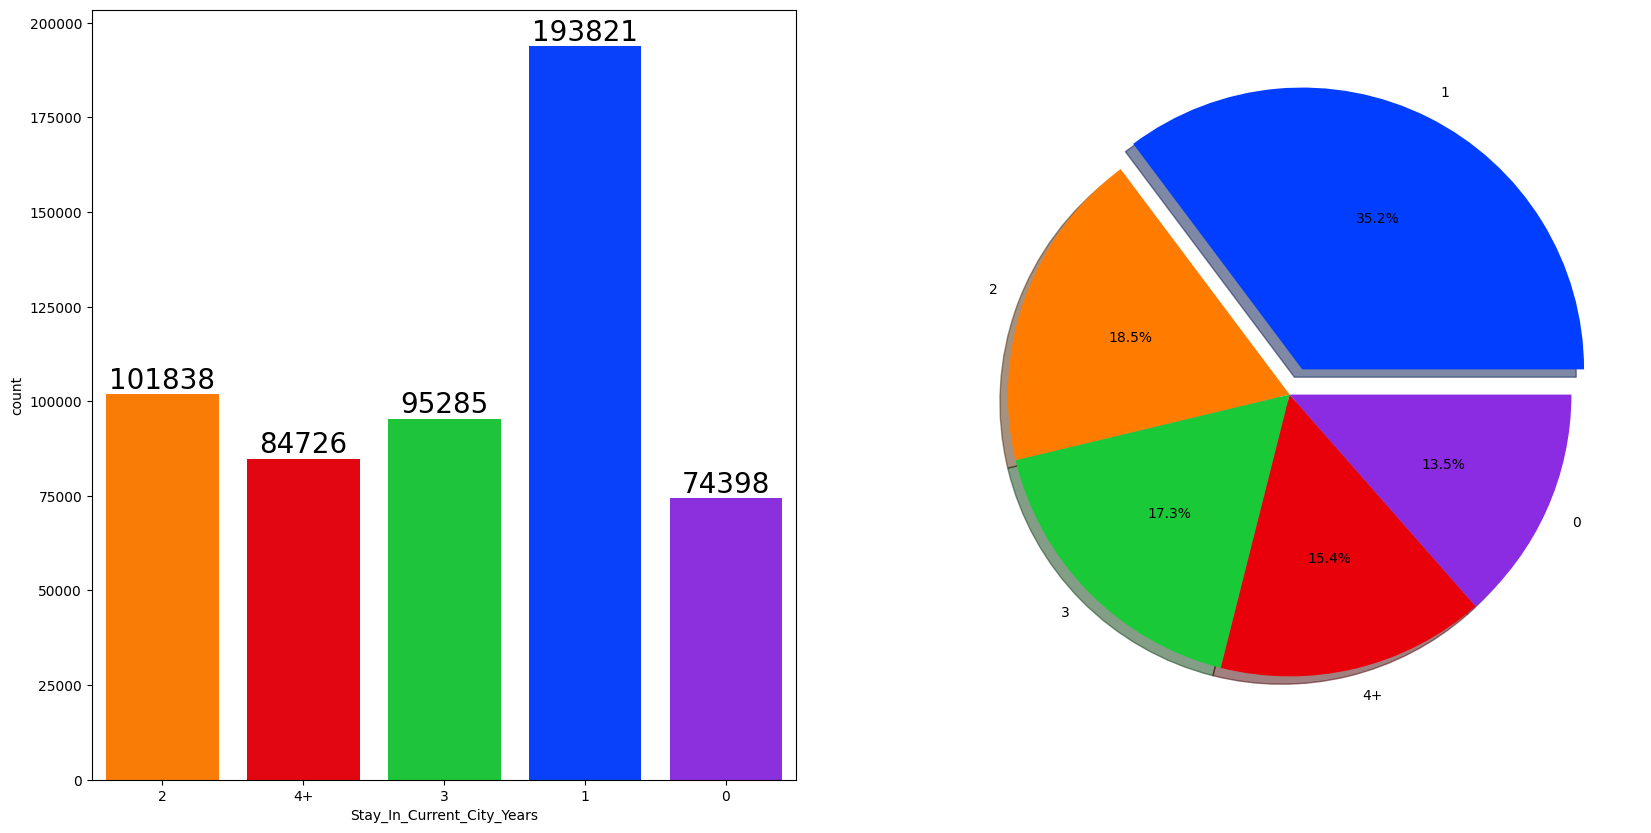

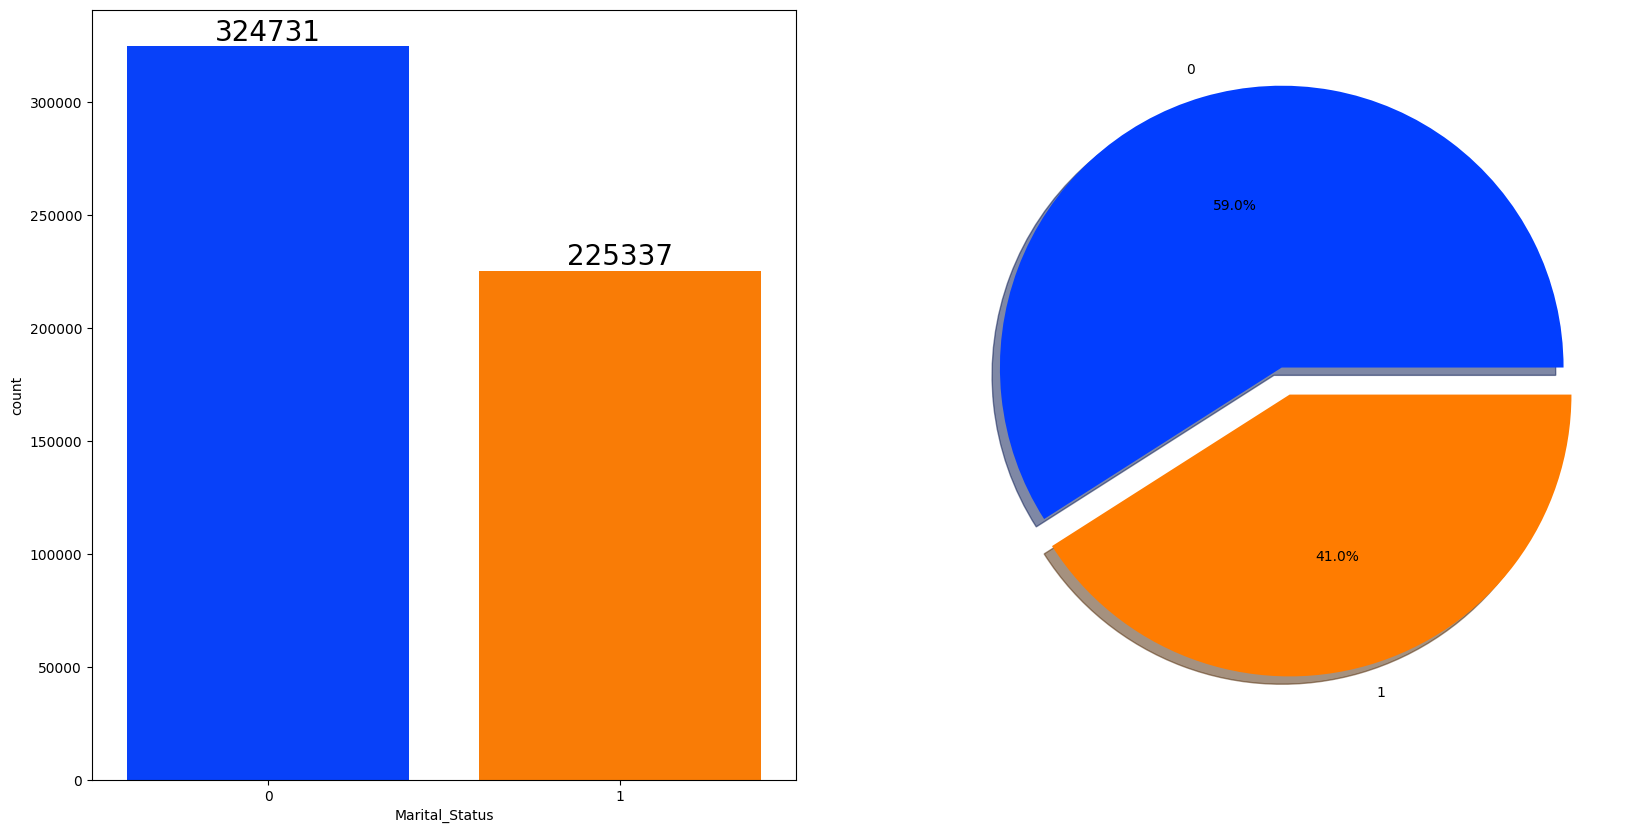

In [12]:
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

# Define a color palette
palette = sns.color_palette('bright')

for col in cat_cols:

    # Get the unique values and their counts
    unique_values = df[col].value_counts()
    unique_labels = unique_values.index

    # Create a mapping from unique values to colors
    color_map = {label: color for label, color in zip(unique_labels, palette[:len(unique_labels)])}

    f, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Countplot in the first subplot
    sns.countplot(x=col, data=df, palette=color_map, ax=ax[0], saturation=0.95)
    for container in ax[0].containers:
        ax[0].bar_label(container, color='black', size=20)

    # Pie chart in the second subplot
    explode = [0.1 if count == max(unique_values) else 0 for count in unique_values]
    colors = [color_map[label] for label in unique_labels]
    ax[1].pie(x=unique_values, labels=unique_labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors)

    plt.show()

### Obseravtions:

1. There are 75% males and 25% females in this dataset.
2. According to this dataset in walmart, 40% people are from 26-35 age group followed by 36-45 age group which stands at 20%.
3. 60% people are unmarried who come to shop products in walmart whereas remaining 40% are married couple. 
4. A large number of people are new to the town. That is people here change cities frequency. 
5. 42% people came from city category B in this dataset followed by city category C (31%). 

### Age Distribution

<Axes: xlabel='Age', ylabel='Count'>

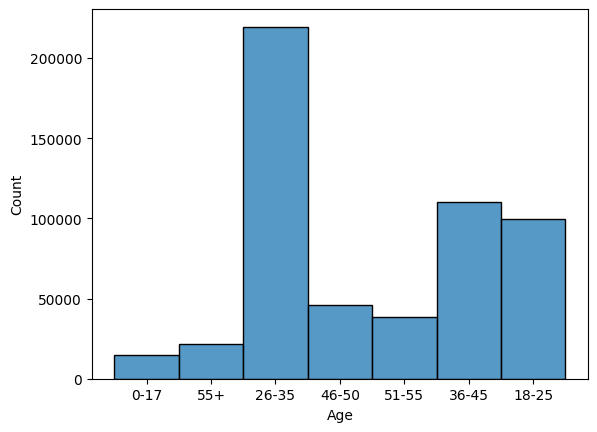

In [14]:
sns.histplot(data=df, x='Age')

<Axes: xlabel='Purchase', ylabel='Density'>

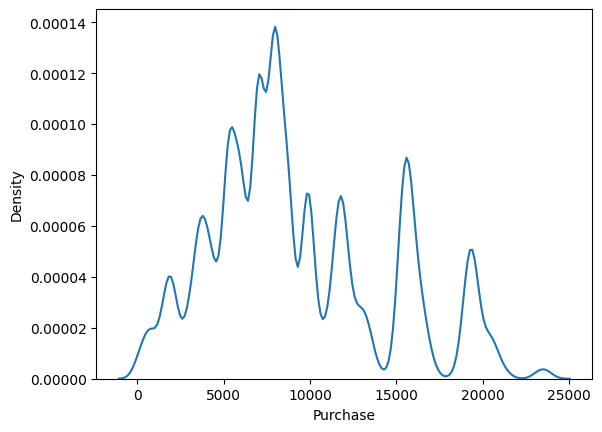

In [15]:
sns.kdeplot(data=df, x='Purchase')


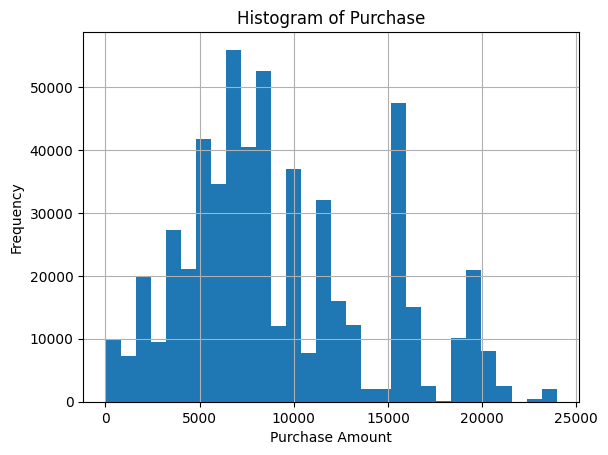

In [16]:
df['Purchase'].hist(bins=30)
plt.title('Histogram of Purchase')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


### Observations:

1. 26-35 and 36-46 Age group members share 40% and 20% to the overall sell of walmart respectively. 
2. The company can offer attractive offers and discount to these age group people in order to increase their sell. 

### Relation between Purchase and each categorical column

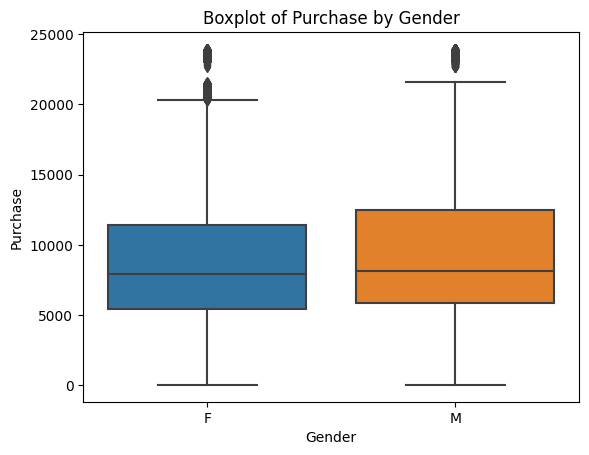

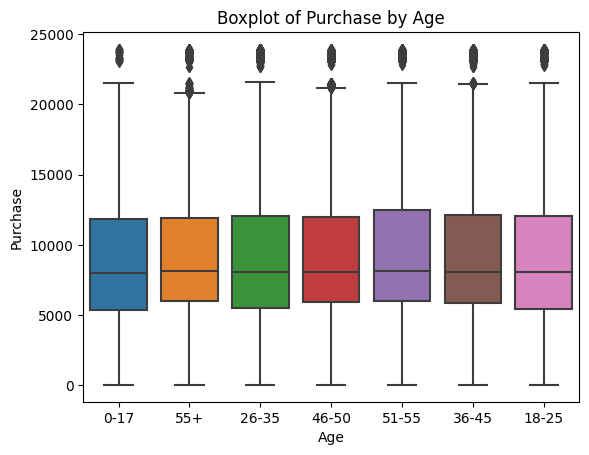

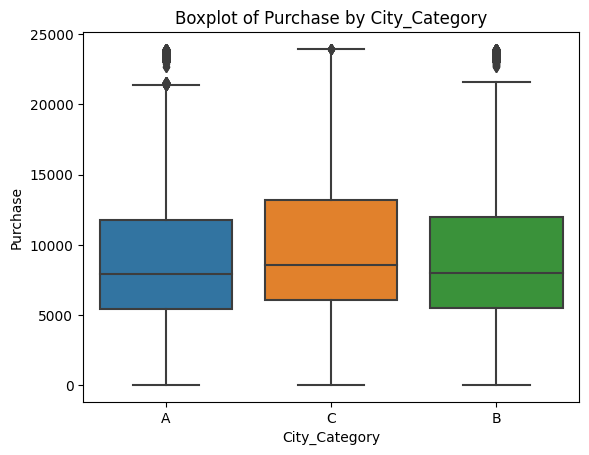

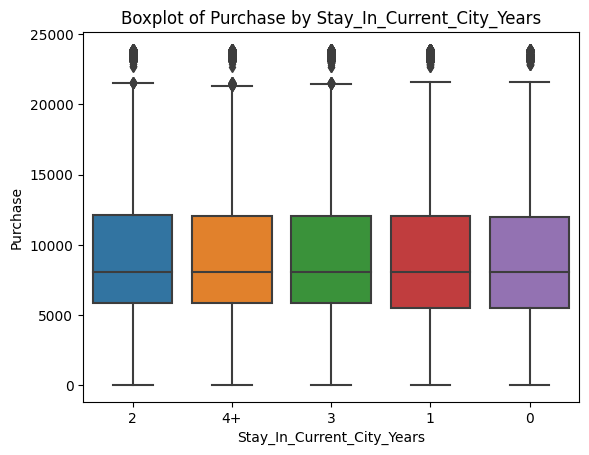

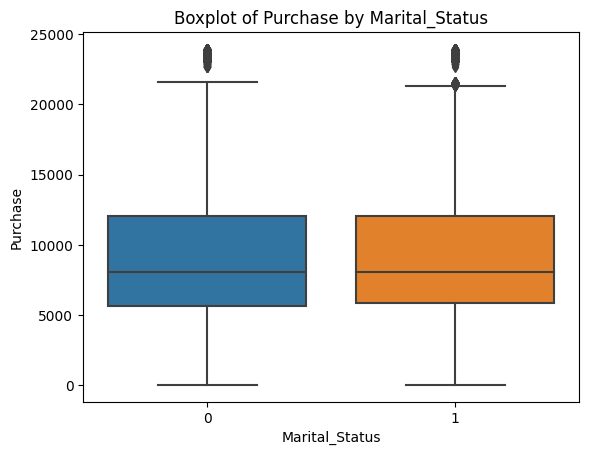

In [43]:
for col in cat_cols:

    sns.boxplot(x=col, y='Purchase', data=df)
    plt.title(f'Boxplot of Purchase by {col}')
    plt.show()


### Observations:

1. With all the categories outliers are there. 
2. The median value of spending for married and unmarried people are nearly the same.
3. The median value of spending for males is a less high then females.
4. The median value of spending between city category A and B  is nearly the same. However, with city category C  the median value of spending is higher than city category A and B. So the company can add  more products in city category C to maximize its sells.
5. In terms of year of years stay in the current city, the spending avg is almost the same. 
 


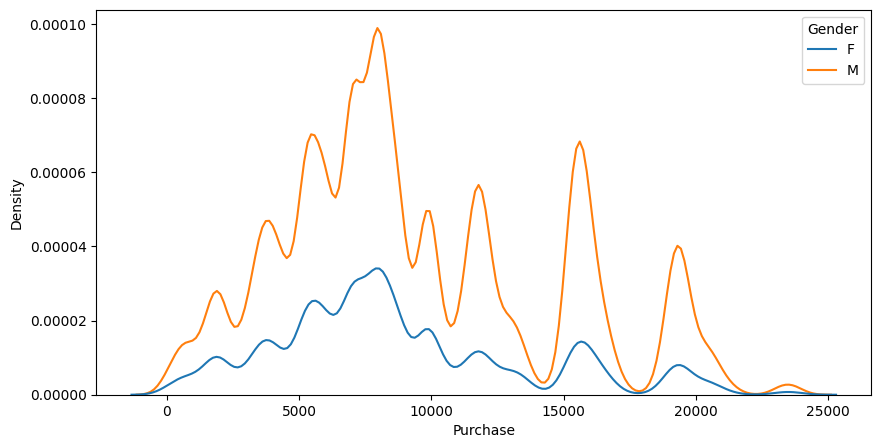

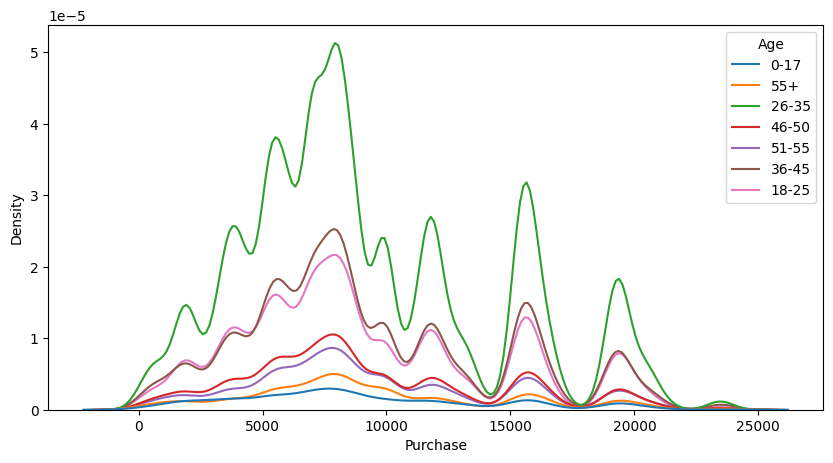

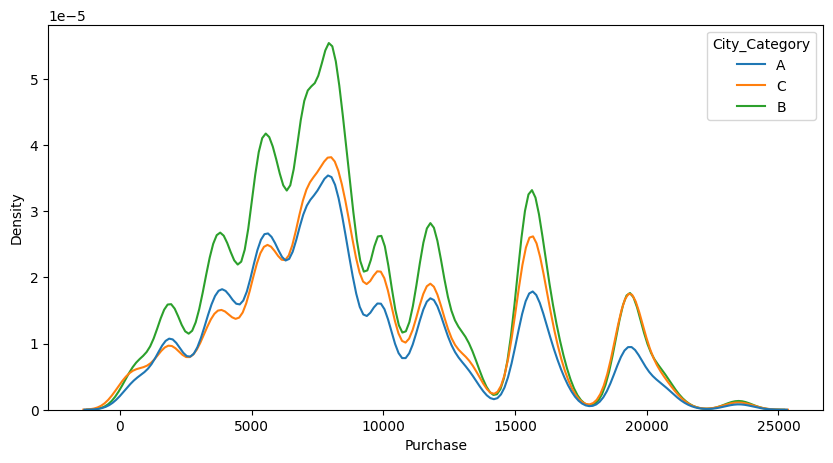

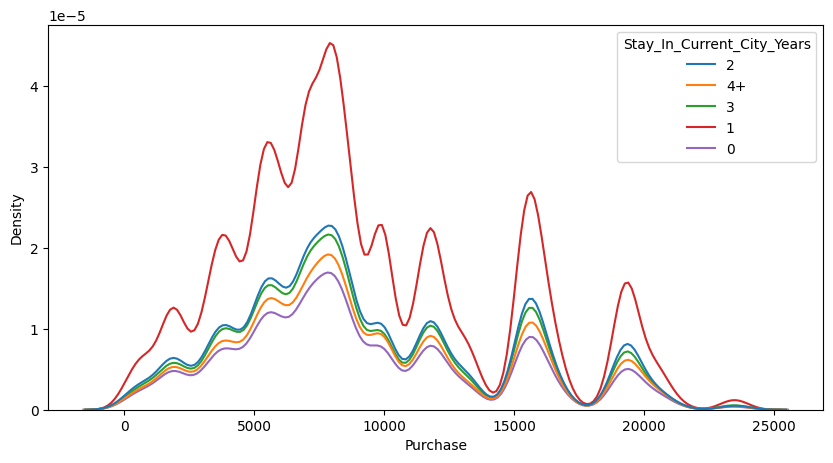

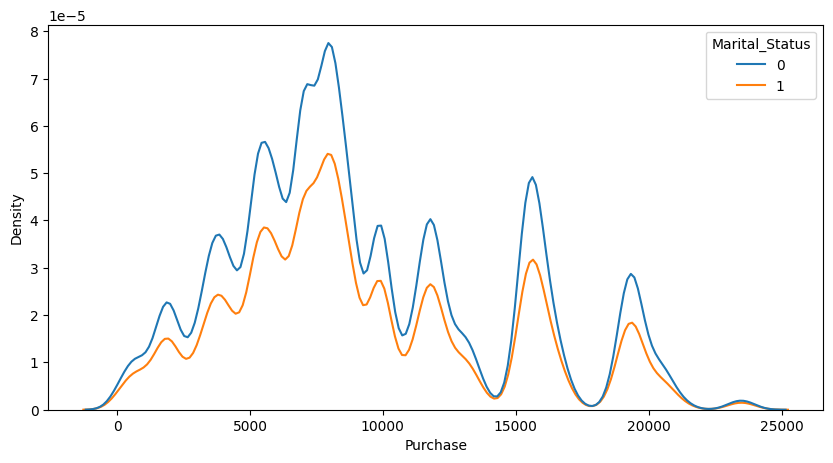

In [18]:
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df, x='Purchase', hue=col)
    plt.show()


### Observations: 

1. The people with age group '26-35' share a large portion of the company overall total sold amount.
2. The median value for purchases is 8047 whereas the average value is around 9263. The max purchase made is of 23961. This shows that the distribution is not normally. In fact it is left skewed that means many are only few people spend over than a certain amount. Most of the people spend around 8500 only to meet thier basic needs. 
3. This observation is alo stand true whether it is men/women, married or unmarried people or from which city category are there from. 
4. We can conclude that there is overlapping between the mean of spending amount w.r.t columns like gender, marital status, city category and Stay_In_Current_City_Years.

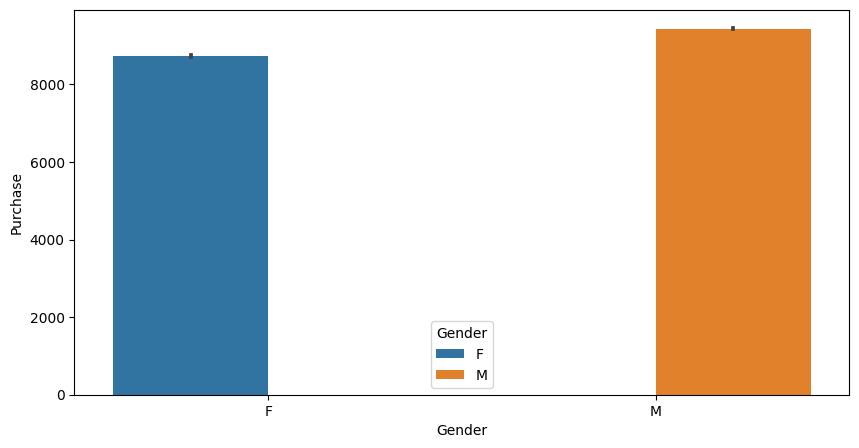

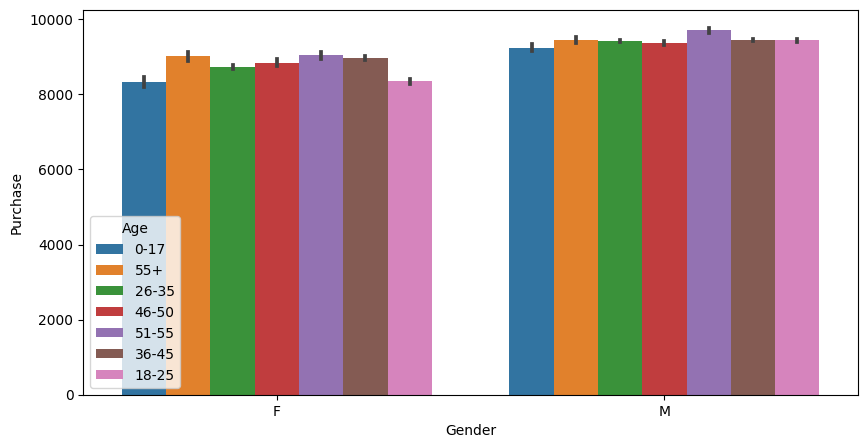

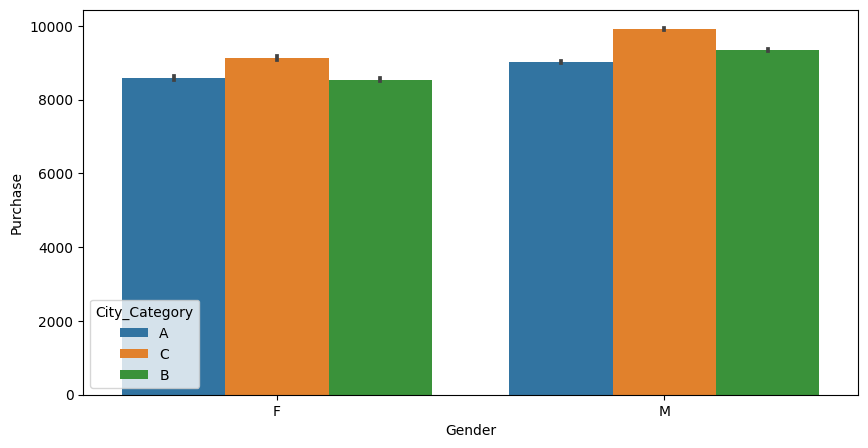

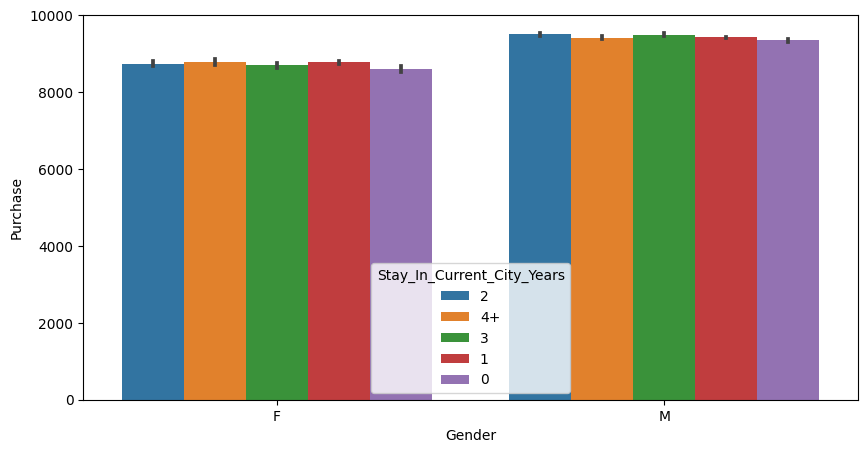

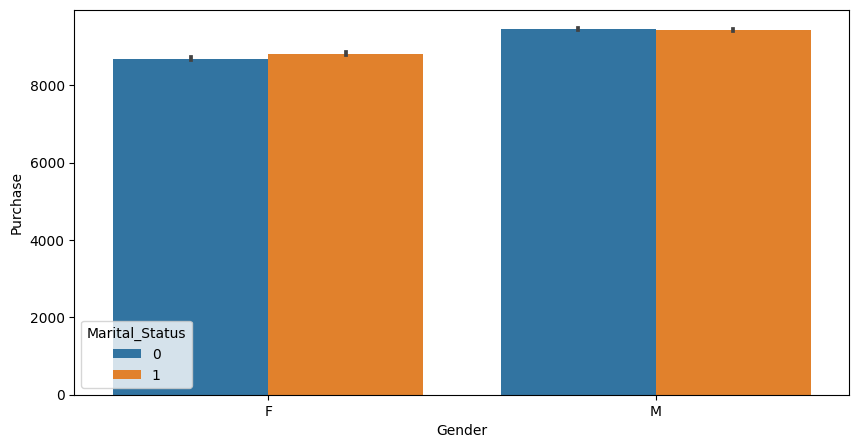

In [19]:
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.barplot(data=df, y='Purchase', hue=col, x='Gender')
    plt.show()

### Observations:

1. Whether male are married or unmarried , they are more likely to have a higher spending average than females. This is true for "Stay_In_Current_City_Years" and "Age" columns also. 
2. In term of city category, Category C has higher spending avg as compared to Category A and B whether that person is a male or a female. 

### Unique Count for each category

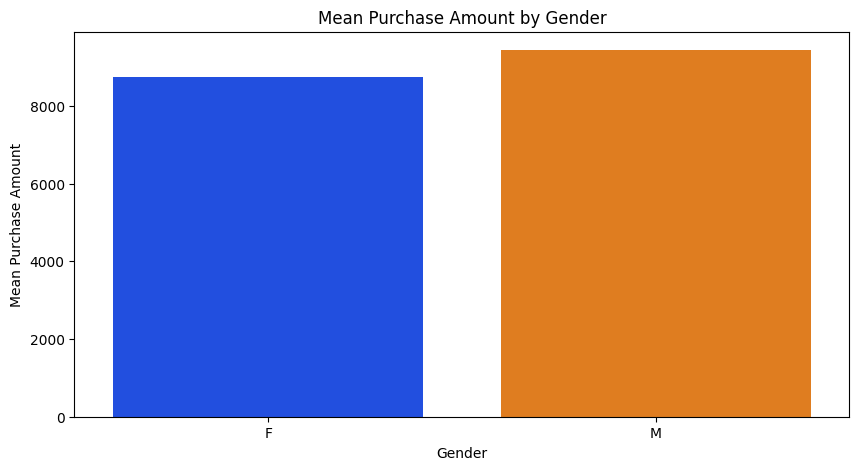

  Gender     Purchase
0      F  8734.565765
1      M  9437.526040
--------------------------------


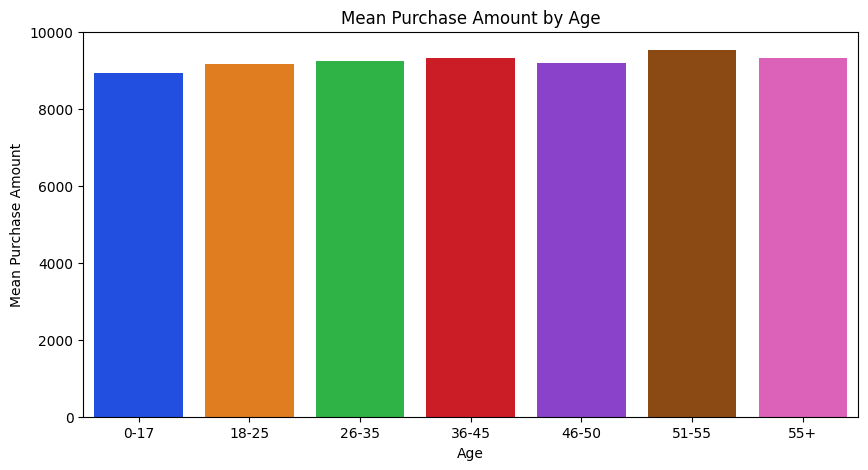

     Age     Purchase
0   0-17  8933.464640
1  18-25  9169.663606
2  26-35  9252.690633
3  36-45  9331.350695
4  46-50  9208.625697
5  51-55  9534.808031
6    55+  9336.280459
--------------------------------


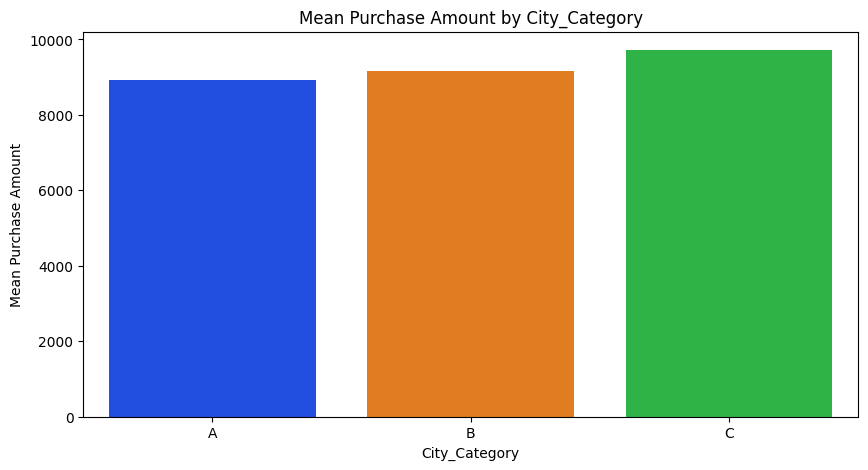

  City_Category     Purchase
0             A  8911.939216
1             B  9151.300563
2             C  9719.920993
--------------------------------


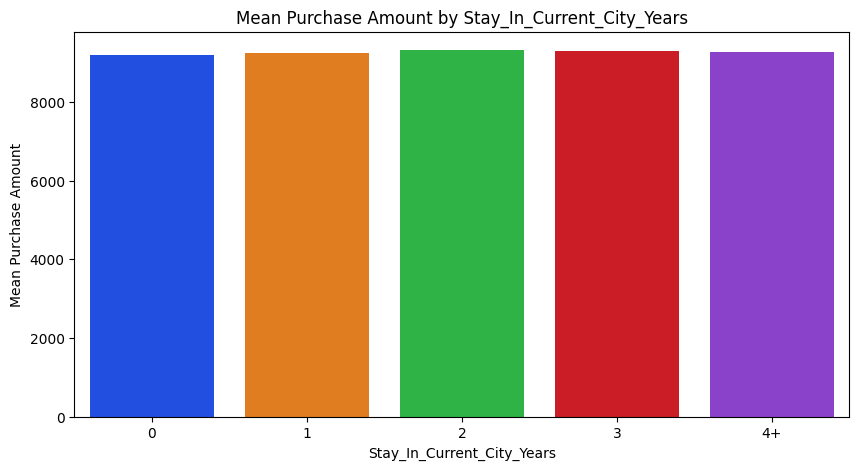

  Stay_In_Current_City_Years     Purchase
0                          0  9180.075123
1                          1  9250.145923
2                          2  9320.429810
3                          3  9286.904119
4                         4+  9275.598872
--------------------------------


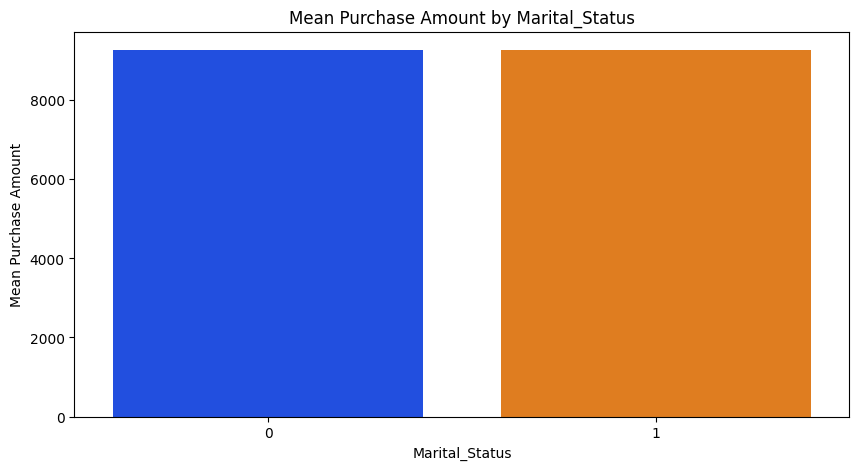

   Marital_Status     Purchase
0               0  9265.907619
1               1  9261.174574
--------------------------------


In [20]:
for col in cat_cols:
    # Calculate mean purchase for each category
    mean_purchase = df.groupby(col)['Purchase'].mean().reset_index()
    
    # Plot the bar plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='Purchase', data=mean_purchase, palette='bright')
    plt.title(f'Mean Purchase Amount by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Purchase Amount')
    plt.show()

    # Print the mean values for reference
    print(mean_purchase)
    print("--------------------------------")

### Observations:


The average purchases for each category are as follows:

1. **Gender**:
   ```text
   Gender  Purchase
   F       8734.565765
   M       9437.526040



2. **Marital_Status**:
   ```text
Marital_Status   Purchase
0                9265.907619
1                9261.174574



3. **Stay_In_Current_City_Years**:
   ```text
Stay_In_Current_City_Years   Purchase
0                            9180.075123
1                            9250.145923
2                            9320.429810
3                            9286.904119
4+                           9275.598872



4. **City_Category**:
   ```text
City_Category   Purchase
A               8911.939216
B               9151.300563
C               9719.920993


5. **Age**:
   ```text

5.      Age     Purchase
       0-17   8933.464640
       18-25  9169.663606
       26-35  9252.690633
       36-45  9331.350695
       46-50  9208.625697
       51-55  9534.808031
       55+    9336.280459

### Hypothesis testing whether males average spending is more than female mean spending.

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_61750/3957621091.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Purchase', data=df, estimator=np.mean, ci=None, palette='bright')


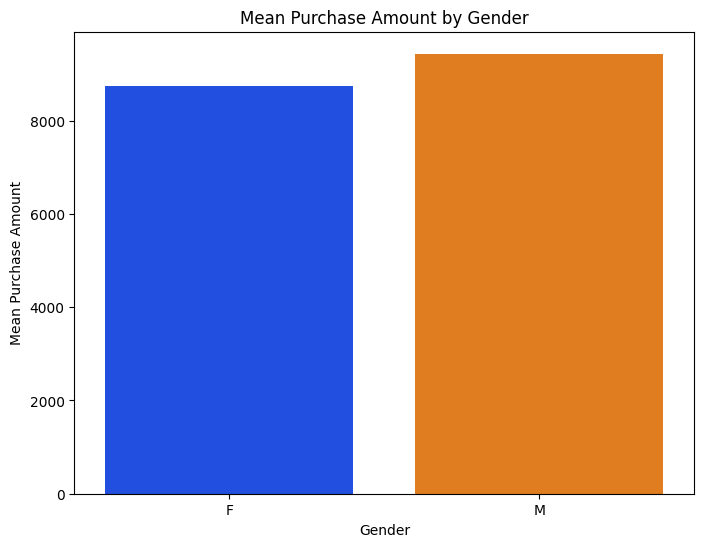

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase', data=df, estimator=np.mean, ci=None, palette='bright')
plt.title('Mean Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Purchase Amount')
plt.show()

In [26]:
from scipy.stats import ttest_ind

# Perform independent samples t-test
purchase_women = df[df['Gender'] == 'F']['Purchase']
purchase_men = df[df['Gender'] == 'M']['Purchase']

t_stat, p_value = ttest_ind(purchase_women, purchase_men)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in spending between women and men.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in spending between women and men.")

T-statistic: -44.837957934353966
P-value: 0.0
Reject the null hypothesis: There is a significant difference in spending between women and men.


### Since the sample size is very large, with both tests i.e. t-test and z-test we can get the same  result. 

In [27]:
import numpy as np
from scipy.stats import norm

# Separate the purchase data by gender
purchase_women = df[df['Gender'] == 'F']['Purchase']
purchase_men = df[df['Gender'] == 'M']['Purchase']

# Calculate means
mean_women = np.mean(purchase_women)
mean_men = np.mean(purchase_men)

# Calculate standard deviations
std_women = np.std(purchase_women, ddof=1)
std_men = np.std(purchase_men, ddof=1)

# Calculate sample sizes
n_women = len(purchase_women)
n_men = len(purchase_men)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((std_women**2 / n_women) + (std_men**2 / n_men))

# Calculate the z-statistic
z_stat = (mean_women - mean_men) / pooled_std

# Calculate the p-value
p_value = 2 * norm.cdf(-abs(z_stat))

print(f'Z-statistic: {z_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in spending between women and men.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in spending between women and men.")


Z-statistic: -46.35824866962607
P-value: 0.0
Reject the null hypothesis: There is a significant difference in spending between women and men.


In [28]:
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Mean purchase (women): 8734.565765155476, CI: (8709.21154714068, 8759.919983170272)
Mean purchase (men): 9437.526040472265, CI: (9422.01944736257, 9453.032633581959)


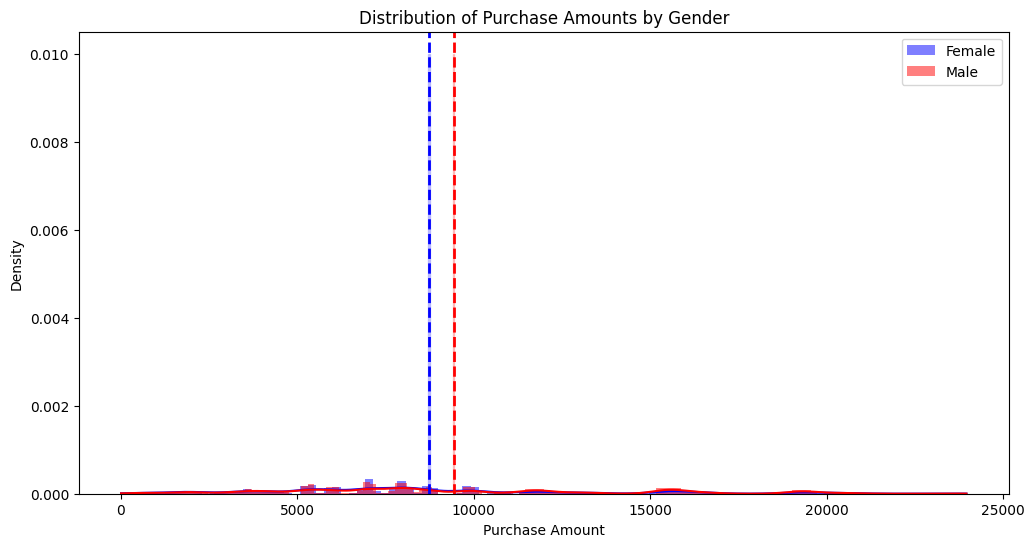

The confidence intervals of average male and female spending are not overlapping.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm

# Assuming df is your DataFrame

# Calculate mean and standard error of the mean (SEM) for each gender
mean_purchase_women = df[df['Gender'] == 'F']['Purchase'].mean()
mean_purchase_men = df[df['Gender'] == 'M']['Purchase'].mean()

sem_women = df[df['Gender'] == 'F']['Purchase'].sem()
sem_men = df[df['Gender'] == 'M']['Purchase'].sem()

# Define the confidence level
confidence_level = 0.95
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate confidence intervals
ci_women = (mean_purchase_women - z_score * sem_women, mean_purchase_women + z_score * sem_women)
ci_men = (mean_purchase_men - z_score * sem_men, mean_purchase_men + z_score * sem_men)

print(f"Mean purchase (women): {mean_purchase_women}, CI: {ci_women}")
print(f"Mean purchase (men): {mean_purchase_men}, CI: {ci_men}")

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Distribution plots
sns.histplot(df[df['Gender'] == 'F']['Purchase'], color='blue', kde=True, label='Female', stat="density", linewidth=0)
sns.histplot(df[df['Gender'] == 'M']['Purchase'], color='red', kde=True, label='Male', stat="density", linewidth=0)

# Adding mean and confidence intervals to the plot
plt.axvline(mean_purchase_women, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(mean_purchase_men, color='red', linestyle='dashed', linewidth=2)
plt.fill_betweenx([0, 0.01], ci_women[0], ci_women[1], color='blue', alpha=0.2)
plt.fill_betweenx([0, 0.01], ci_men[0], ci_men[1], color='red', alpha=0.2)

plt.title('Distribution of Purchase Amounts by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

# Check for overlap
if (ci_women[0] <= ci_men[1] and ci_women[1] >= ci_men[0]):
    print("The confidence intervals of average male and female spending are overlapping.")
else:
    print("The confidence intervals of average male and female spending are not overlapping.")


### Observations:

- With both the tests we can conclude that there is a significant difference in spending between the two groups i.e males and females.


### Hypothesis testing whether married people average spending is more than unmarried people mean spending.

/var/folders/4m/vrm5g1l51xn5x3bdqm97xhsr0000gn/T/ipykernel_61750/1840485200.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Marital_Status', y='Purchase', data=df, estimator=np.mean, ci=None, palette='bright')


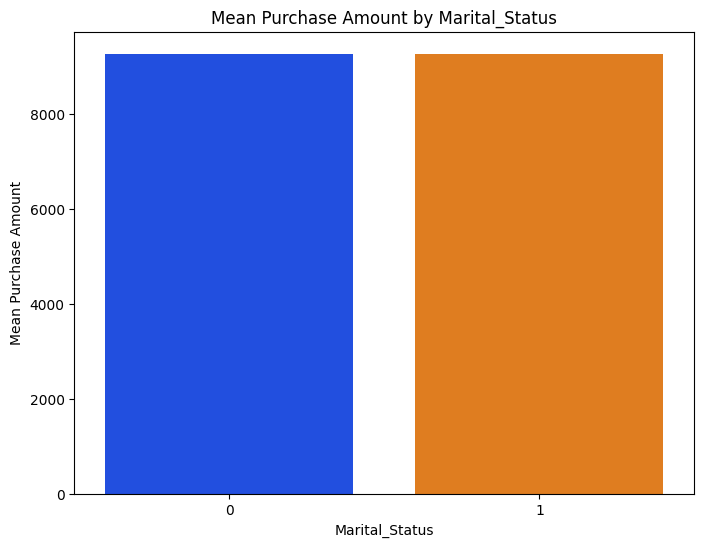

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_Status', y='Purchase', data=df, estimator=np.mean, ci=None, palette='bright')
plt.title('Mean Purchase Amount by Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Mean Purchase Amount')
plt.show()

In [30]:
# Perform independent samples t-test
purchase_unmarried = df[df['Marital_Status'] == 0]['Purchase']
purchase_married = df[df['Marital_Status'] == 1]['Purchase']

t_stat, p_value = ttest_ind(purchase_unmarried, purchase_married)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in spending between married and unmarried people.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in spending between married and unmarried people.")

T-statistic: 0.3436698055440526
P-value: 0.7310947525758316
Fail to reject the null hypothesis: There is no significant difference in spending between married and unmarried people.


In [31]:
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

### Observations:

- There is no significant difference in spending between married and unmarried people.

### Checking confidence intervals and distribution of the mean of the expenses by different city category (A, B and C) customers 

City Category: A
Mean purchase: 8911.939216084484
Confidence Interval: (8886.991825864907, 8936.88660630406)
--------------------------------
City Category: B
Mean purchase: 9151.300562781986
Confidence Interval: (9131.099848963764, 9171.501276600207)
--------------------------------
City Category: C
Mean purchase: 9719.92099313568
Confidence Interval: (9695.337107885243, 9744.504878386117)
--------------------------------


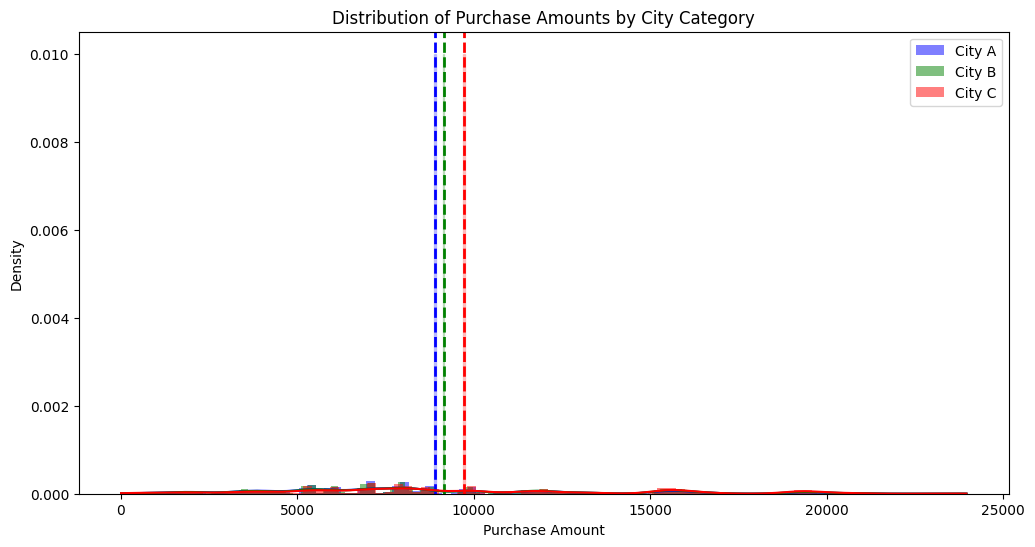

Overlap between A and B: False
Overlap between A and C: False
Overlap between B and C: False


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Assuming df is your DataFrame
city_categories = ['A', 'B', 'C']

# Define a confidence level
confidence_level = 0.95
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Initialize a dictionary to store the mean, SEM, and confidence intervals for each city category
city_stats = {}

for city in city_categories:
    # Calculate mean and standard error of the mean (SEM) for each city category
    mean_purchase = df[df['City_Category'] == city]['Purchase'].mean()
    sem_purchase = df[df['City_Category'] == city]['Purchase'].sem()
    
    # Calculate confidence intervals
    ci = (mean_purchase - z_score * sem_purchase, mean_purchase + z_score * sem_purchase)
    
    # Store the results in the dictionary
    city_stats[city] = {
        'mean': mean_purchase,
        'sem': sem_purchase,
        'ci': ci
    }
    
    # Print the results
    print(f"City Category: {city}")
    print(f"Mean purchase: {mean_purchase}")
    print(f"Confidence Interval: {ci}")
    print("--------------------------------")

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Define colors for each city category
colors = {'A': 'blue', 'B': 'green', 'C': 'red'}

for city in city_categories:
    # Distribution plots
    sns.histplot(df[df['City_Category'] == city]['Purchase'], kde=True, label=f'City {city}', stat="density", linewidth=0, color=colors[city])
    
    # Adding mean and confidence intervals to the plot
    mean = city_stats[city]['mean']
    ci = city_stats[city]['ci']
    plt.axvline(mean, color=colors[city], linestyle='dashed', linewidth=2)
    plt.fill_betweenx([0, 0.01], ci[0], ci[1], color=colors[city], alpha=0.2)

plt.title('Distribution of Purchase Amounts by City Category')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

# Check for overlap between confidence intervals
ci_A = city_stats['A']['ci']
ci_B = city_stats['B']['ci']
ci_C = city_stats['C']['ci']

def check_overlap(ci1, ci2):
    return ci1[0] <= ci2[1] and ci1[1] >= ci2[0]

print("Overlap between A and B:", check_overlap(ci_A, ci_B))
print("Overlap between A and C:", check_overlap(ci_A, ci_C))
print("Overlap between B and C:", check_overlap(ci_B, ci_C))


### Checking confidence intervals and distribution of the mean of the expenses by different Age Group customers. 


Age Group: 26-35
Mean purchase: 9252.690632869888
Confidence Interval: (9231.733676400028, 9273.647589339747)
--------------------------------
Age Group: 36-45
Mean purchase: 9331.350694917874
Confidence Interval: (9301.669410965314, 9361.031978870433)
--------------------------------
Age Group: 18-25
Mean purchase: 9169.663606261289
Confidence Interval: (9138.407948753442, 9200.919263769136)
--------------------------------
Age Group: 46-50
Mean purchase: 9208.625697468327
Confidence Interval: (9163.085142648752, 9254.166252287903)
--------------------------------
Age Group: 51-55
Mean purchase: 9534.808030960236
Confidence Interval: (9483.991472776577, 9585.624589143894)
--------------------------------
Age Group: 55+
Mean purchase: 9336.280459449405
Confidence Interval: (9269.29883441773, 9403.262084481079)
--------------------------------
Age Group: 0-17
Mean purchase: 8933.464640444974
Confidence Interval: (8851.947970542686, 9014.981310347262)
--------------------------------


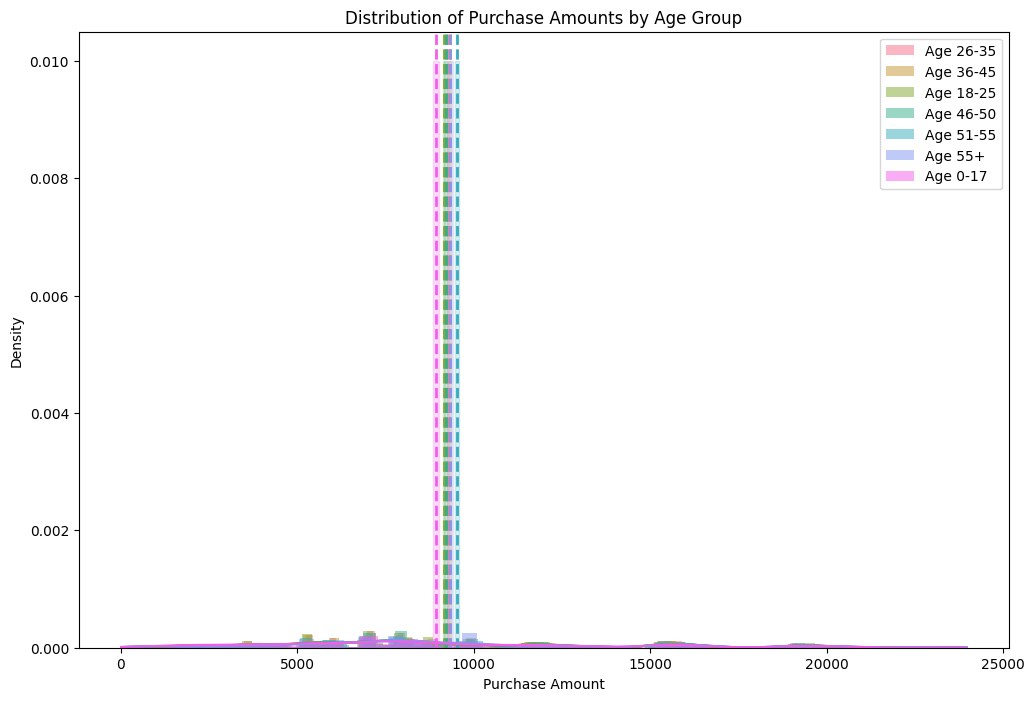

Overlap between 26-35 and 36-45: False
Overlap between 26-35 and 18-25: False
Overlap between 26-35 and 46-50: True
Overlap between 26-35 and 51-55: False
Overlap between 26-35 and 55+: True
Overlap between 26-35 and 0-17: False
Overlap between 36-45 and 18-25: False
Overlap between 36-45 and 46-50: False
Overlap between 36-45 and 51-55: False
Overlap between 36-45 and 55+: True
Overlap between 36-45 and 0-17: False
Overlap between 18-25 and 46-50: True
Overlap between 18-25 and 51-55: False
Overlap between 18-25 and 55+: False
Overlap between 18-25 and 0-17: False
Overlap between 46-50 and 51-55: False
Overlap between 46-50 and 55+: False
Overlap between 46-50 and 0-17: False
Overlap between 51-55 and 55+: False
Overlap between 51-55 and 0-17: False
Overlap between 55+ and 0-17: False


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Assuming df is your DataFrame
age_groups = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']

# Define a confidence level
confidence_level = 0.95
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

# Initialize a dictionary to store the mean, SEM, and confidence intervals for each age group
age_stats = {}

for age in age_groups:
    # Calculate mean and standard error of the mean (SEM) for each age group
    mean_purchase = df[df['Age'] == age]['Purchase'].mean()
    sem_purchase = df[df['Age'] == age]['Purchase'].sem()
    
    # Calculate confidence intervals
    ci = (mean_purchase - z_score * sem_purchase, mean_purchase + z_score * sem_purchase)
    
    # Store the results in the dictionary
    age_stats[age] = {
        'mean': mean_purchase,
        'sem': sem_purchase,
        'ci': ci
    }
    
    # Print the results
    print(f"Age Group: {age}")
    print(f"Mean purchase: {mean_purchase}")
    print(f"Confidence Interval: {ci}")
    print("--------------------------------")

# Plotting the distributions
plt.figure(figsize=(12, 8))

# Define a color palette for age groups
colors = sns.color_palette('husl', len(age_groups))

for i, age in enumerate(age_groups):
    # Distribution plots
    sns.histplot(df[df['Age'] == age]['Purchase'], kde=True, label=f'Age {age}', stat="density", linewidth=0, color=colors[i])
    
    # Adding mean and confidence intervals to the plot
    mean = age_stats[age]['mean']
    ci = age_stats[age]['ci']
    plt.axvline(mean, color=colors[i], linestyle='dashed', linewidth=2)
    plt.fill_betweenx([0, 0.01], ci[0], ci[1], color=colors[i], alpha=0.2)

plt.title('Distribution of Purchase Amounts by Age Group')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

# Check for overlap between confidence intervals
def check_overlap(ci1, ci2):
    return ci1[0] <= ci2[1] and ci1[1] >= ci2[0]

for i, age1 in enumerate(age_groups):
    for j, age2 in enumerate(age_groups):
        if i < j:
            print(f"Overlap between {age1} and {age2}: {check_overlap(age_stats[age1]['ci'], age_stats[age2]['ci'])}")


In [35]:
import pandas as pd
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Assuming df is your DataFrame

# Perform One-Way ANOVA using scipy
age_groups = df['Age'].unique()
grouped_data = [df[df['Age'] == age_group]['Purchase'] for age_group in age_groups]
anova_result = f_oneway(*grouped_data)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Interpret ANOVA results
if anova_result.pvalue < 0.05:
    print("There is a significant difference between the mean expenses of different age groups.")
else:
    print("There is no significant difference between the mean expenses of different age groups.")

# Perform One-Way ANOVA using statsmodels for detailed output and post-hoc tests
model = ols('Purchase ~ Age', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Post-hoc test: Tukey's HSD
tukey = pairwise_tukeyhsd(endog=df['Purchase'], groups=df['Age'], alpha=0.05)
print(tukey)


ANOVA result: F-statistic = 40.57579909450408, p-value = 1.053563939251671e-49
There is a significant difference between the mean expenses of different age groups.
                sum_sq        df          F        PR(>F)
Age       6.140003e+09       6.0  40.575799  1.053564e-49
Residual  1.387270e+13  550061.0        NaN           NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
  0-17  18-25   236.199    0.0  106.9071 365.4908   True
  0-17  26-35   319.226    0.0  194.6669 443.7851   True
  0-17  36-45  397.8861    0.0  269.3973 526.3748   True
  0-17  46-50  275.1611    0.0  136.1875 414.1346   True
  0-17  51-55  601.3434    0.0  459.1789 743.5079   True
  0-17    55+  402.8158    0.0  245.6171 560.0145   True
 18-25  26-35    83.027 0.0003   26.4748 139.5792   True
 18-25  36-45  161.6871    0.0   96.9373 226.4369   True
 18-25  46-50   38.9621 0.8162  -44

### Observations:

With the permutation and combination of overlapping between different age group :

- Overlap between 26-35 and 36-45: False
- Overlap between 26-35 and 18-25: False
- Overlap between 26-35 and 46-50: True
- Overlap between 26-35 and 51-55: False
- Overlap between 26-35 and 55+: True
- Overlap between 26-35 and 0-17: False
- Overlap between 36-45 and 18-25: False
- Overlap between 36-45 and 46-50: False
- Overlap between 36-45 and 51-55: False
- Overlap between 36-45 and 55+: True
- Overlap between 36-45 and 0-17: False
- Overlap between 18-25 and 46-50: True
- Overlap between 18-25 and 51-55: False
- Overlap between 18-25 and 55+: False
- Overlap between 18-25 and 0-17: False
- Overlap between 46-50 and 51-55: False
- Overlap between 46-50 and 55+: False
- Overlap between 46-50 and 0-17: False
- Overlap between 51-55 and 55+: False
- Overlap between 51-55 and 0-17: False
- Overlap between 55+ and 0-17: False

we can conclude that :

Wherever the overlapping is true, there is no significant difference between the mean of those age group. That means the spending behaviour in terms of amount of money between these age group are same, whereas where there is no overlap we can conclude that the spending behaviour in terms of amount of money between these age group are different.

We cannot comment on which type of products these age group people bought. 






In [36]:
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
3442,1000550,P00196542,M,46-50,8,B,1,1,5,6870
165778,1001611,P00173942,M,26-35,0,B,1,0,1,11863
366297,1002351,P00250842,F,26-35,0,B,4+,0,8,4117
268532,1005382,P00201342,M,18-25,4,C,0,1,1,15537
186218,1004725,P00215642,M,36-45,5,A,2,0,8,5910
123237,1001059,P00265142,F,26-35,0,B,3,0,3,8200
415993,1004007,P00218142,M,36-45,12,A,1,1,1,19357
530533,1003724,P00196442,M,36-45,6,B,4+,0,5,7011
487632,1003189,P00259342,M,26-35,16,A,1,0,5,8888
242661,1001394,P00053842,F,26-35,3,A,0,0,4,3502


### %wise Top 10 product ID and Product category is contributing maximum to the total sell of Walmart

In [37]:
product_wise_sum = df.groupby(['Product_ID'])['Purchase'].sum().reset_index()

# Sort the resulting DataFrame by the 'Purchase' column in descending order
product_wise_sum = product_wise_sum.sort_values(by='Purchase', ascending=False)[:10]

product_wise_sum['Percentage'] = product_wise_sum['Purchase']/5095812742*100

product_wise_sum

,Product_ID,Purchase,Percentage
249,P00025442,27995166,0.549376
1016,P00110742,26722309,0.524397
2443,P00255842,25168963,0.493915
582,P00059442,24338343,0.477615
1745,P00184942,24334887,0.477547
1030,P00112142,24216006,0.475214
1018,P00110942,23639564,0.463902
2263,P00237542,23425576,0.459702
565,P00057642,23102780,0.453368
104,P00010742,22164153,0.434948


In [41]:
product_category_sum = df.groupby(['Product_ID', 'Product_Category'])['Purchase'].sum().reset_index()

# Sort the resulting DataFrame by the 'Purchase' column in descending order
product_category_sum = product_category_sum.sort_values(by='Purchase', ascending=False)[:10]

product_category_sum['Percentage'] = product_category_sum['Purchase']/5095812742*100

product_category_sum

,Product_ID,Product_Category,Purchase,Percentage
249,P00025442,1,27995166,0.549376
1016,P00110742,1,26722309,0.524397
2443,P00255842,16,25168963,0.493915
582,P00059442,6,24338343,0.477615
1745,P00184942,1,24334887,0.477547
1030,P00112142,1,24216006,0.475214
1018,P00110942,1,23639564,0.463902
2263,P00237542,1,23425576,0.459702
565,P00057642,1,23102780,0.453368
104,P00010742,1,22164153,0.434948


### Chi-Square Goodness of Fit Test to check if contribution of all the product ID is significant different or not.
The Chi-Square Goodness of Fit test can be used to see if the observed distribution of the top 10 products is significantly different from what would be expected under a uniform distribution (or any other specified distribution).

In [38]:
import scipy.stats as stats
import numpy as np

# Observed frequencies (percentages) multiplied by total number of sales for accuracy
observed = np.array([0.549376, 0.524397, 0.493915, 0.477615, 0.477547, 0.475214, 0.463902, 0.459702, 0.453368, 0.434948])
observed *= len(df['Purchase'])  

# Expected frequencies if all products had equal sales percentages
expected = np.full_like(observed, fill_value=np.mean(observed))

# Perform chi-square test
chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The observed distribution of sales is significantly different from the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed distribution of sales is not significantly different from the expected distribution.")


Chi-Square Statistic: 11907.689760108602
P-value: 0.0
Reject the null hypothesis: The observed distribution of sales is significantly different from the expected distribution.


### ANOVA Test
If you want to compare the mean sales across multiple groups (e.g., different product categories within the top 10), an ANOVA test can be helpful.

In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a DataFrame with the top 10 products data
data = {
    'Product_ID': ['P00025442', 'P00110742', 'P00255842', 'P00059442', 'P00184942', 'P00112142', 'P00110942', 'P00237542', 'P00057642', 'P00010742'],
    'Product_Category': [1, 1, 16, 6, 1, 1, 1, 1, 1, 1],
    'Purchase': [27995166, 26722309, 25168963, 24338343, 24334887, 24216006, 23639564, 23425576, 23102780, 22164153]
}

df_top10 = pd.DataFrame(data)

# Perform ANOVA
model = ols('Purchase ~ C(Product_Category)', data=df_top10).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

p_val_anova = anova_table['PR(>F)'][0]
if p_val_anova < alpha:
    print("Reject the null hypothesis: At least one group has a different mean sales.")
else:
    print("Fail to reject the null hypothesis: All groups have the same mean sales.")


                           sum_sq   df         F    PR(>F)
C(Product_Category)  4.924395e+11  2.0  0.064927  0.937694
Residual             2.654594e+13  7.0       NaN       NaN
Fail to reject the null hypothesis: All groups have the same mean sales.


### Descriptive Analysis and Confidence Intervals

In [40]:
import scipy.stats as stats
import numpy as np

# Function to calculate confidence interval
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

# Calculate confidence intervals for each product
for product in df_top10['Product_ID']:
    product_data = df[df['Product_ID'] == product]['Purchase']
    mean, lower, upper = mean_confidence_interval(product_data)
    print(f'Product {product}: Mean={mean}, CI=({lower}, {upper})')


Product P00025442: Mean=17334.46811145511, CI=(17190.21183691495, 17478.72438599527)
Product P00110742: Mean=16577.11476426799, CI=(16417.52181425722, 16736.70771427876)
Product P00255842: Mean=18198.816341287056, CI=(18032.204076185837, 18365.428606388276)
Product P00059442: Mean=17310.343527738263, CI=(17117.581365604943, 17503.105689871583)
Product P00184942: Mean=16899.227083333335, CI=(16736.794785792128, 17061.659380874542)
Product P00112142: Mean=15503.204865556978, CI=(15325.826202851726, 15680.58352826223)
Product P00110942: Mean=17382.032352941176, CI=(17238.129173818106, 17525.935532064246)
Product P00237542: Mean=16804.57388809182, CI=(16619.81956880993, 16989.328207373714)
Product P00057642: Mean=15716.176870748299, CI=(15538.64254069399, 15893.711200802607)
Product P00010742: Mean=16417.891111111112, CI=(16234.736889098185, 16601.04533312404)


### Observations:

1. Product_ID: P00025442 and Product_Category: 1 are contributing maximum to the sales of walmart followed by P00110742 and P00255842 Product_IDs. 

## Business insights 

### Males v/s Females

The significant difference in spending between men and women indicates that men tend to spend more per transaction compared to women. This information can be leveraged in several ways:

1. Targeted Marketing Campaigns: Develop marketing strategies and promotional campaigns that are tailored to male customers, who are spending more per transaction. This can include personalized offers, loyalty programs, and advertisements that appeal specifically to men.

2. Product Recommendations: Focus on upselling and cross-selling higher-priced products to male customers.

3. Customer Experience: Enhance the shopping experience for male customers by analyzing their preferences and optimizing product assortments that cater to their spending patterns.

4. Promotional Offers: Create specific promotions and discounts for women to encourage higher spending, thereby reducing the gap in spending between genders.

### Married v/s Unmarried People

Since there is no significant difference in spending between married and unmarried individuals, the company can consider the following actions:

1. Uniform Marketing Strategy: Develop a unified marketing approach for both married and unmarried customers, as their spending habits do not differ significantly.
2. Focus on Other Segments: Instead of focusing on marital status, segment customers based on other factors like age, gender, or city category to identify more significant differences in spending behavior.
3. Customer Engagement: Engage both married and unmarried customers equally through loyalty programs, personalized communication, and targeted promotions that do not differentiate based on marital status.

### Each City Category

The significant differences in spending across different city categories indicate that customers from different cities have distinct spending behaviors. This can be leveraged in several ways:

1. Localized Marketing Campaigns: Develop city-specific marketing campaigns that cater to the unique spending patterns of each city category. For example, create more aggressive promotions in City C, where customers spend the most.
2. Product Assortment: Tailor product assortments to match the spending capacity of customers in each city category. Stock higher-priced items in City C and more budget-friendly items in City A.
3. Resource Allocation: Allocate marketing budgets and resources based on the spending potential of each city category. Focus more resources on high-spending cities like City C to maximize returns.
4. Promotional Strategies: Design promotional strategies that consider the spending power of each city. For instance, offer premium loyalty programs and exclusive deals in City C to further increase customer spending.
5. Store Placement and Expansion: If applicable, consider opening new stores or expanding existing ones in high-spending cities to capitalize on the higher spending behavior of customers in those areas.

### For each age group


The ANOVA test and subsequent pairwise comparisons reveal significant differences in average spending between various age groups. These differences can be leveraged to tailor marketing strategies, product offerings, and promotional activities to different age segments.

- Insights on Age Group 0-17:

1. Lower Spending: The age group 0-17 spends significantly less on average compared to all other age groups. The differences are particularly large when compared to older age groups like 51-55 and 55+.
2. Marketing Strategy: Given their lower spending, marketing efforts for this group should focus on budget-friendly products, discounts, and promotions aimed at younger customers and possibly their parents or guardians who make purchasing decisions for them.

- Insights on Age Group 18-25:

1. Moderate Spending: The age group 18-25 spends more than the 0-17 group but less than older age groups. The significant differences are observed when compared to the 26-35, 36-45, 51-55, and 55+ age groups.
2. Targeted Campaigns: This group likely includes young adults, college students, and early-career professionals. Marketing campaigns can focus on lifestyle products, technology, and services that appeal to young adults' aspirations and needs.

- Insights on Age Group 26-35:

1. Increasing Spending: This group shows higher spending compared to the 18-25 and 0-17 age groups. Significant differences are noted particularly with 18-25 and 0-17 groups.
2. Engagement Opportunities: This group is likely to consist of working professionals, young families, and individuals with increasing purchasing power. Promotions can focus on convenience, family-oriented products, and mid-range to premium products.

- Insights on Age Group 36-45:

1. High Spending: The age group 36-45 has a significantly higher average spending compared to younger age groups (0-17, 18-25). However, it shows no significant difference compared to the 55+ group.
2. Premium Products: This group is likely to be well-established in their careers and financially stable. Marketing can focus on premium products, services that offer value and quality, and loyalty programs.

- Insights on Age Group 46-50:

1. Fluctuating Spending: Spending is significantly higher than the 36-45 age group but not significantly different from the 26-35 age group.
2. Lifestyle Marketing: This group is likely to be transitioning towards a more stable and established lifestyle. Marketing can highlight products that enhance lifestyle, health, and wellness.

- Insights on Age Group 51-55 and 55+:

1. Highest Spending: The age groups 51-55 and 55+ have the highest average spending. The difference is especially significant compared to younger groups (0-17, 18-25, 26-35).
2. Focus on Quality: Marketing strategies for these groups can emphasize quality, luxury, and long-term value. Products and services that cater to their lifestyle, health needs, and leisure activities can be promoted.

**Overall Business Strategy**

- Segmented Marketing: Develop age-specific marketing campaigns that cater to the unique preferences and spending behaviors of each age group.
- Product Assortment: Adjust product offerings to align with the purchasing power and interests of different age groups. For example, offer more budget-friendly options for younger customers and premium products for older customers.
- Promotional Activities: Design promotions and discounts that target specific age groups during peak shopping seasons, holidays, or events relevant to each demographic.
- Customer Experience: Enhance the shopping experience by providing personalized recommendations, loyalty programs, and exclusive deals tailored to different age segments.